In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('train_set_nostandard.csv')
#print(dataset_train.info())
training_set = dataset_train.iloc[:, 1:].values

      date  T10Y3M  curvature  BAMLCC0A1AAATRIV  DPRIME  VIXCLS          DJIA  \
0        0    1.35       0.21            207.57    8.25   21.14   6442.490234   
1        1    1.35       0.21            207.86    8.25   19.13   6544.089844   
2        2    1.37       0.23            207.66    8.25   19.89   6567.180176   
3        3    1.41       0.23            207.38    8.25   19.35   6600.660156   
4        4    1.44       0.26            207.16    8.25   20.24   6549.479980   
5        5    1.39       0.23            207.98    8.25   20.91   6625.669922   
6        6    1.46       0.32            206.76    8.25   19.63   6703.790039   
7        7    1.55       0.43            206.93    8.25   19.84   6709.180176   
8        8    1.34       0.24            208.04    8.25   19.27   6762.290039   
9        9    1.37       0.27            208.07    8.25   19.40   6726.879883   
10      10    1.41       0.27            207.57    8.25   19.61   6765.370117   
11      11    1.42       0.3

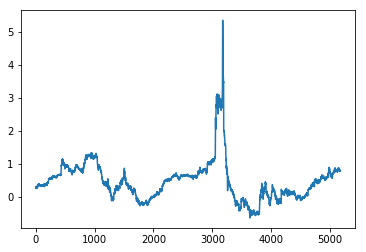

In [3]:
print(dataset_train)
plt.plot(training_set[:,-1])

[[ 1.3500e+00  2.1000e-01  2.0757e+02 ...  2.2140e+01  1.5302e+02
   2.6000e-01]
 [ 1.3500e+00  2.1000e-01  2.0786e+02 ...  2.2450e+01  1.5270e+02
   2.8000e-01]
 [ 1.3700e+00  2.3000e-01  2.0766e+02 ...  2.2470e+01  1.5342e+02
   2.6000e-01]
 ...
 [ 1.5600e+00 -4.4000e-01  6.1013e+02 ...  9.6070e+01  9.6389e+02
   7.7000e-01]
 [ 1.5000e+00 -4.6000e-01  6.1072e+02 ...  9.6120e+01  9.7970e+02
   8.0000e-01]
 [ 1.4800e+00 -5.2000e-01  6.1142e+02 ...  9.5410e+01  9.5821e+02
   8.0000e-01]]


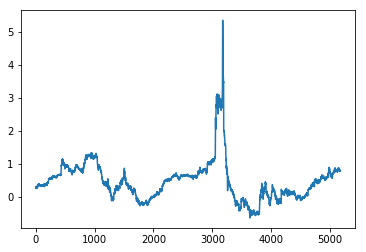

In [4]:
from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set)
training_set_scaled =training_set
print(training_set_scaled)
plt.plot(training_set_scaled[:,-1])

In [5]:
print(training_set)

[[ 1.3500e+00  2.1000e-01  2.0757e+02 ...  2.2140e+01  1.5302e+02
   2.6000e-01]
 [ 1.3500e+00  2.1000e-01  2.0786e+02 ...  2.2450e+01  1.5270e+02
   2.8000e-01]
 [ 1.3700e+00  2.3000e-01  2.0766e+02 ...  2.2470e+01  1.5342e+02
   2.6000e-01]
 ...
 [ 1.5600e+00 -4.4000e-01  6.1013e+02 ...  9.6070e+01  9.6389e+02
   7.7000e-01]
 [ 1.5000e+00 -4.6000e-01  6.1072e+02 ...  9.6120e+01  9.7970e+02
   8.0000e-01]
 [ 1.4800e+00 -5.2000e-01  6.1142e+02 ...  9.5410e+01  9.5821e+02
   8.0000e-01]]


In [8]:
n=dataset_train.shape[0]
m=3 # the better value for m is 60

X_train = []
y_train = []
for i in range(m, n):
    X_train.append(training_set_scaled[i-m, 0:-2])
    y_train.append(training_set_scaled[i, -1])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],1,  X_train.shape[1]))
print(X_train.shape)

(5171, 1, 24)


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
u=1
d=0.2
regressor = Sequential()

regressor.add(LSTM(units = u, return_sequences = True, input_shape = (1, X_train.shape[2])))
regressor.add(Dropout(d))

regressor.add(LSTM(units = u, return_sequences = True))
regressor.add(Dropout(d))

regressor.add(LSTM(units = u, return_sequences = True))
regressor.add(Dropout(d))

regressor.add(LSTM(units = u))
regressor.add(Dropout(d))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 15, batch_size = 8)

Epoch 1/15
5171/5171 [==============================] - 4s 837us/step - loss: 0.4376
Epoch 2/15
5171/5171 [==============================] - 2s 395us/step - loss: 0.3837
Epoch 3/15
5171/5171 [==============================] - 2s 395us/step - loss: 0.3808
Epoch 4/15
5171/5171 [==============================] - 2s 369us/step - loss: 0.3795
Epoch 5/15
5171/5171 [==============================] - 2s 384us/step - loss: 0.3802
Epoch 6/15
5171/5171 [==============================] - 2s 369us/step - loss: 0.3806
Epoch 7/15
5171/5171 [==============================] - 2s 367us/step - loss: 0.3798
Epoch 8/15
5171/5171 [==============================] - 2s 383us/step - loss: 0.3796
Epoch 9/15
5171/5171 [==============================] - 2s 365us/step - loss: 0.3797
Epoch 10/15
5171/5171 [==============================] - 2s 393us/step - loss: 0.3797
Epoch 11/15
5171/5171 [==============================] - 2s 404us/step - loss: 0.3793
Epoch 12/15
5171/5171 [==============================] - 2s 378

In [11]:
dataset_test = pd.read_csv('test_set_nostandard.csv')
real_price = dataset_test.iloc[:, -1].values
print( real_price.reshape(-1,1))

[[0.81]
 [0.81]
 [0.82]
 [0.81]
 [0.78]
 [0.75]
 [0.67]
 [0.67]
 [0.67]
 [0.69]
 [0.68]
 [0.66]
 [0.65]
 [0.68]
 [0.69]
 [0.65]
 [0.65]
 [0.66]
 [0.66]
 [0.66]
 [0.68]
 [0.65]
 [0.66]
 [0.67]
 [0.67]
 [0.69]
 [0.66]
 [0.65]
 [0.63]
 [0.64]
 [0.61]
 [0.58]
 [0.6 ]
 [0.61]
 [0.59]
 [0.59]
 [0.59]
 [0.58]
 [0.58]
 [0.58]
 [0.59]
 [0.58]
 [0.59]
 [0.59]
 [0.6 ]
 [0.59]
 [0.61]
 [0.61]
 [0.62]
 [0.62]
 [0.61]
 [0.63]
 [0.61]
 [0.6 ]
 [0.63]
 [0.59]
 [0.59]
 [0.58]
 [0.59]
 [0.6 ]
 [0.57]
 [0.57]
 [0.57]
 [0.61]
 [0.65]
 [0.63]
 [0.61]
 [0.61]
 [0.62]
 [0.62]
 [0.65]
 [0.63]
 [0.62]
 [0.61]
 [0.6 ]
 [0.58]
 [0.59]
 [0.6 ]
 [0.6 ]
 [0.6 ]
 [0.6 ]
 [0.62]
 [0.63]
 [0.62]
 [0.67]
 [0.65]
 [0.63]
 [0.62]
 [0.63]
 [0.63]
 [0.62]
 [0.63]
 [0.64]
 [0.63]
 [0.65]
 [0.66]
 [0.65]
 [0.66]
 [0.67]
 [0.68]
 [0.68]
 [0.68]
 [0.67]
 [0.68]
 [0.66]
 [0.67]
 [0.66]
 [0.67]
 [0.68]
 [0.68]
 [0.7 ]
 [0.69]
 [0.67]
 [0.67]
 [0.67]
 [0.71]
 [0.7 ]
 [0.7 ]
 [0.7 ]
 [0.72]
 [0.7 ]
 [0.7 ]
 [0.7 ]
 [0.69]
 [0.66]


In [12]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
dataset_total.index = dataset_total.date 
#print(len(dataset_total)- len(dataset_test) - m)
inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - m:,1:].values
#inputs = inputs.reshape(-1,1)
#inputs = sc.fit_transform(inputs)
#print(type(inputs))
X_test = []
n_t=dataset_test.shape[0]
for i in range(m, n_t):
    X_test.append(list(inputs[i-m, 0:-2]))

In [13]:
X_test = np.array(X_test)
#print(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_test.shape)
predicted_price = regressor.predict(X_test)
#print(predicted_price)
#print(real_price)
#a=sc.fit_transform(real_price.reshape(-1,1))
#predicted_price = sc.inverse_transform(predicted_price)
#predicted_price=np.array(predicted_price).reshape(1,-1)[0]
#print(predicted_price)

(572, 1, 24)


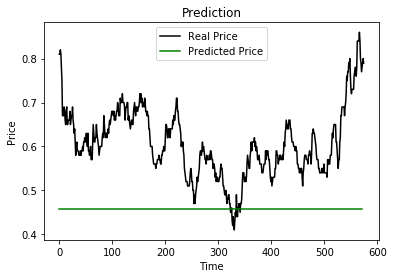

In [14]:
plt.plot(real_price, color = 'black', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [167]:
dataset_test=dataset_train
real_price = dataset_test.iloc[:, -1].values
dataset_total = pd.concat((dataset_train['predict'], dataset_test['predict']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - m:].values
inputs = inputs.reshape(-1,1)
#inputs = sc.fit_transform(inputs)
X_test = []
n_t=dataset_train.shape[0]
for i in range(m, n_t):
    X_test.append(inputs[i-m:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = regressor.predict(X_test)
#print(predicted_price)
#predicted_price = sc.inverse_transform(predicted_price)
#print(predicted_price)
plt.plot(real_price, color = 'blue', label = 'Real Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

ValueError: Error when checking input: expected lstm_21_input to have shape (24, 1) but got array with shape (3, 1)